In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set(style="whitegrid")

In [13]:
df = pd.read_csv('patient_heart_rate_clean.csv')
df

,Unnamed: 0,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,0,0,1.0,56.0,70.0,Micky,Mous,72,m,0,6
1,1,14,1.0,56.0,70.0,Micky,Mous,69,m,6,12
2,2,28,1.0,56.0,70.0,Micky,Mous,71,m,12,18
3,3,43,2.0,34.0,70.0,Donald,Duck,85,f,0,6
4,4,57,2.0,34.0,70.0,Donald,Duck,84,f,6,12
5,5,71,2.0,34.0,70.0,Donald,Duck,76,f,12,18
6,6,44,3.0,16.0,74.0,Mini,Mouse,65,f,0,6
7,7,58,3.0,16.0,74.0,Mini,Mouse,69,f,6,12
8,8,72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
9,9,3,4.0,34.0,78.0,Scrooge,McDuck,78,m,0,6


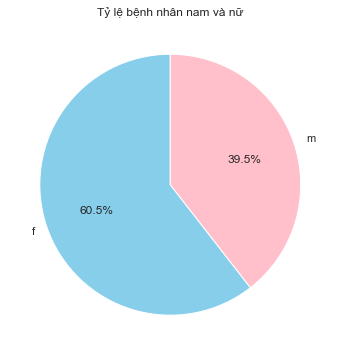

In [14]:
# 1. Vẽ biểu đồ Pie để thể hiện tỷ lệ bệnh nhân nam và nữ
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title("Tỷ lệ bệnh nhân nam và nữ")
plt.show()

In [15]:
# 2. Tạo cột Fullname = Firstname + ' ' + Lastname
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']

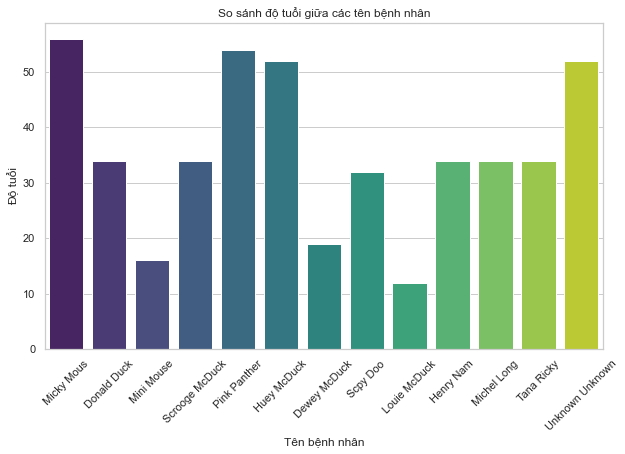

In [16]:
# 3. Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân
plt.figure(figsize=(10, 6))
sns.barplot(x='Fullname', y='Age', data=df.drop_duplicates(subset='Fullname'), ci=None, palette="viridis")
plt.xticks(rotation=45)
plt.title("So sánh độ tuổi giữa các tên bệnh nhân")
plt.xlabel("Tên bệnh nhân")
plt.ylabel("Độ tuổi")
plt.show()

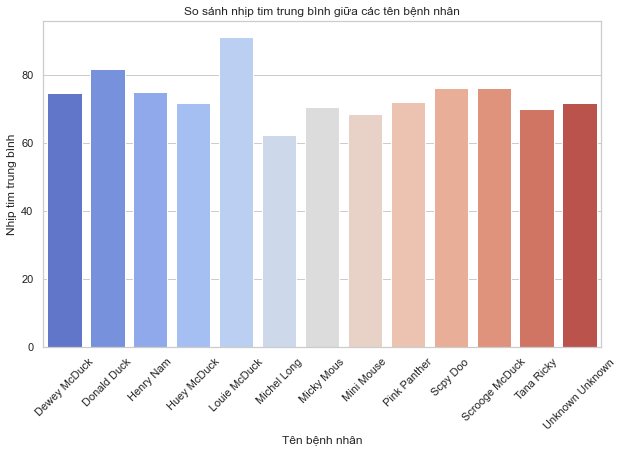

In [17]:
# 4. Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân
avg_pulse_by_name = df.groupby('Fullname')['PulseRate'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Fullname', y='PulseRate', data=avg_pulse_by_name, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("So sánh nhịp tim trung bình giữa các tên bệnh nhân")
plt.xlabel("Tên bệnh nhân")
plt.ylabel("Nhịp tim trung bình")
plt.show()

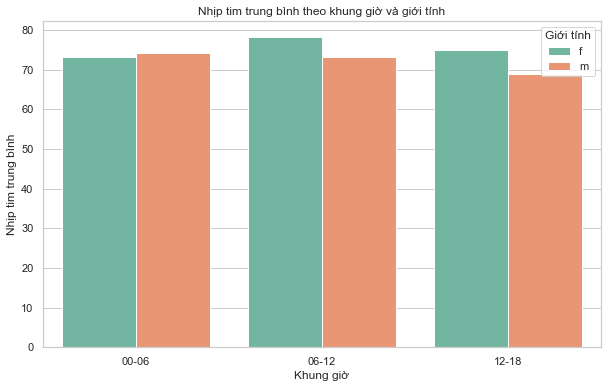

In [18]:
# 5. Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ và giới tính
df['TimeGroup'] = pd.cut(df['Lower_hour'], bins=[0, 6, 12, 18], labels=["00-06", "06-12", "12-18"], right=False)
avg_pulse_by_time_sex = df.groupby(['TimeGroup', 'Gender'])['PulseRate'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='TimeGroup', y='PulseRate', hue='Gender', data=avg_pulse_by_time_sex, palette="Set2")
plt.title("Nhịp tim trung bình theo khung giờ và giới tính")
plt.xlabel("Khung giờ")
plt.ylabel("Nhịp tim trung bình")
plt.legend(title="Giới tính")
plt.show()

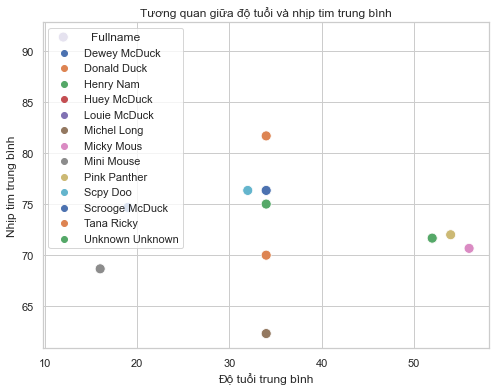

In [19]:
# 6. Vẽ biểu đồ phân tán thể hiện tương quan giữa trung bình độ tuổi và trung bình nhịp tim
avg_stats = df.groupby('Fullname').agg({'Age': 'mean', 'PulseRate': 'mean'}).reset_index()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='PulseRate', data=avg_stats, hue='Fullname', palette="deep", s=100)
plt.title("Tương quan giữa độ tuổi và nhịp tim trung bình")
plt.xlabel("Độ tuổi trung bình")
plt.ylabel("Nhịp tim trung bình")
plt.show()

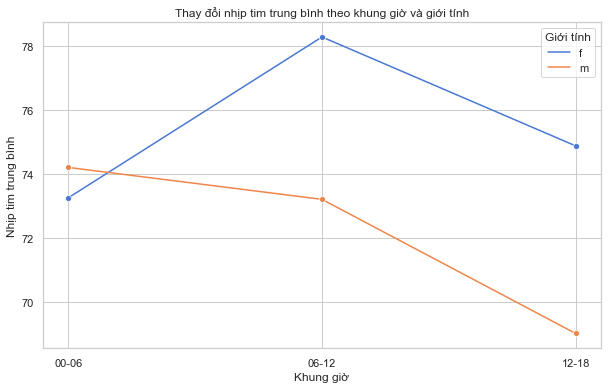

In [20]:
# 7. Vẽ biểu đồ đường thể hiện sự thay đổi nhịp tim trung bình theo khung giờ và giới tính
avg_pulse_by_time_sex_sorted = avg_pulse_by_time_sex.sort_values(by=['TimeGroup', 'Gender'])
plt.figure(figsize=(10, 6))
sns.lineplot(x='TimeGroup', y='PulseRate', hue='Gender', data=avg_pulse_by_time_sex_sorted, marker='o', palette="muted")
plt.title("Thay đổi nhịp tim trung bình theo khung giờ và giới tính")
plt.xlabel("Khung giờ")
plt.ylabel("Nhịp tim trung bình")
plt.legend(title="Giới tính")
plt.show()